In [1]:
# Referance  used:  https://www.bd-econ.com/blsapi.html
#import os
#import sys
from google.colab import drive
from google.colab import files
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive/', force_remount=True)
bls_dir = '/content/drive/My Drive/Colab_Notebooks/DSCI_591_BLS'
%cd {bls_dir}

!python config.py # runs the config file to load your API details
import config # .py file with bls_key = 'API key here'

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(config.bls_key)

# Series stored as a dictionary
series_dict = {
    'CEU0000000001': 'Total Nonfarm Employment, Not Seasonally Adjusted',
    'SMU42000000000000001': 'Pennsylvania, Total Nonfarm, Not seasonally adjusted',
    'SMU42000007000000001': 'Pennsylvania, Leisure and Hospitality, Not seasonally adjusted',
    'SMU42000005000000001': 'Pennsylvania, Information, Not seasonally adjusted'
#    'SMU42000007130000001': 'Pennsylvania, Leisure and Hospitality, Not seasonally adjusted', # job code detailed
#    'SMU42000005170000001': 'Pennsylvania, Information, Not seasonally adjusted'}             # job code detailed
#    'SMU42101007000000001': 'Pennsylvania, Leisure and Hospitality, Not seasonally adjusted', # location code detailed
    }

# Start year and end year
dates = ('2011', '2020')  # currently limited to 10 years?

Mounted at /content/drive/
/content/drive/My Drive/Colab_Notebooks/DSCI_591_BLS


In [2]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [3]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    try:  
      df[series_dict[s['seriesID']]] = pd.Series(
          index = pd.to_datetime(date_list),
          data = [i['value'] for i in s['data']]
          ).astype(float).iloc[::-1]
    except:
      pass
#df.rename(columns={'': 'Date'}, inplace=True)
df.index.names = ['Date']
# Show last 10 results
df.to_csv(f'{bls_dir}/BLS_PA_pandas.csv');
df.tail(10)


,"Total Nonfarm Employment, Not Seasonally Adjusted","Pennsylvania, Total Nonfarm, Not seasonally adjusted","Pennsylvania, Leisure and Hospitality, Not seasonally adjusted","Pennsylvania, Information, Not seasonally adjusted"
Date,,,,
2019-11-01,153177.0,6152.2,563.0,87.6
2019-12-01,152929.0,6121.7,563.8,87.4
2020-01-01,150153.0,5991.7,549.5,85.3
2020-02-01,151076.0,6038.7,550.0,85.3
2020-03-01,150073.0,5990.7,529.5,85.4
2020-04-01,130317.0,5009.7,235.1,77.1
2020-05-01,133432.0,5227.1,294.1,72.9
2020-06-01,138502.0,5454.4,386.8,73.3
2020-07-01,139063.0,5501.5,441.9,74.6


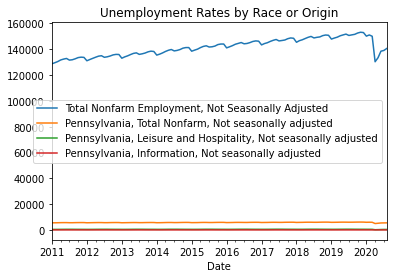

In [4]:
# Simple line plot of the data

df.plot(title='Unemployment Rates by Race or Origin')

In [5]:
bls_df = pd.read_csv(f'{bls_dir}/BLS_Pandas.csv')
list(bls_df.columns) 
#bls_df.tail()

['Date', 'White', 'Black', 'Hispanic']

In [6]:
bls_df['Date'].value_counts().sort_index().head()

2019-01-01    1
2019-02-01    1
2019-03-01    1
2019-04-01    1
2019-05-01    1
Name: Date, dtype: int64

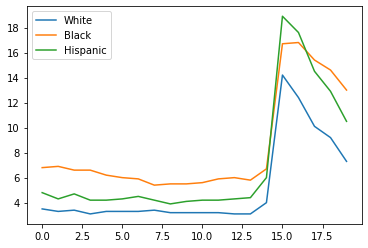

In [7]:
bls_df.plot()   #learning to play with plot
